# Building a brain object

Brain objects are supereeg's fundamental data structure for a single subject's iEEG data.  To create one at minimum you'll need a matrix of neural recordings (time samples by electrodes), electrode locations, and a sample rate. Additionally, you can include information about separate recording sessions and store custom meta data. In this tutorial, we'll build a brain object from scratch and get familiar with some of the methods.

# Load in the required libraries

In [1]:
import warnings 
warnings.simplefilter("ignore")
%matplotlib inline
import supereeg as se
import numpy as np

# Simulate some data

First, we'll use supereeg's built in simulation functions to simulate some data and electrodes. By default, the `simulate_data` function will return a 1000 samples by 10 electrodes matrix, but you can specify the number of time samples with `n_samples` and the number of electrodes with `n_elecs`. If you want further information on simulating data, check out the simulate tutorial!

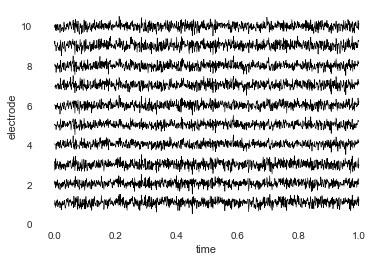

In [2]:
# simulate some data
bo_data = se.simulate_bo(n_samples=1000, sessions=2, n_elecs=10)

# plot it
bo_data.plot_data()

# get just data
data = bo_data.get_data()

We'll also simulate some electrode locations

In [3]:
locs = se.simulate_locations()
print(locs)

    x   y   z
0 -50  49  22
1 -41  23   6
2  -1  17 -28
3  -1 -14 -35
4   9   7 -31
5   9 -39   2
6  14  -3 -47
7  22 -45  22
8  32 -13  44
9  47 -48  19


# Creating a brain object

To construct a new brain objects, simply pass the data and locations to the `Brain` class like this:

In [4]:
bo = se.Brain(data=data, locs=locs, sample_rate=100)

To view a summary of the contents of the brain object, you can call the `info` function:

In [5]:
bo.info()

Number of electrodes: 10
Recording time in seconds: [10.]
Sample Rate in Hz: [100]
Number of sessions: 1
Date created: Thu Mar  8 12:50:03 2018
Meta data: {}


Optionally, you can pass a `sessions` parameter, which is can be a numpy array or list the length of your data with a unique identifier for each session.  For example:

In [6]:
sessions = np.array([1]*(data.shape[0]/2)+[2]*(data.shape[0]/2))
bo = se.Brain(data=data, locs=locs, sample_rate=1000, sessions=sessions)
bo.info()

Number of electrodes: 10
Recording time in seconds: [0.5 0.5]
Sample Rate in Hz: [1000, 1000]
Number of sessions: 2
Date created: Thu Mar  8 12:50:03 2018
Meta data: {}


You can also pass add custom meta data to the brain object to help keep track of its contents. `meta` is a dictionary comprised of whatever you want:

In [7]:
meta = {
    'subjectID' : '123',
    'Investigator' : 'Andy',
    'Hospital' : 'DHMC'
}
bo = se.Brain(data=data, locs=locs, sample_rate=1000, sessions=sessions, meta=meta)
bo.info()

Number of electrodes: 10
Recording time in seconds: [0.5 0.5]
Sample Rate in Hz: [1000, 1000]
Number of sessions: 2
Date created: Thu Mar  8 12:50:03 2018
Meta data: {'Hospital': 'DHMC', 'subjectID': '123', 'Investigator': 'Andy'}


# Initialize brain objects

Brain objects can be initialized by passing a brain object (ending in `.bo`), but can also be initialized with a model object or nifti object by specifying `return_type` as `bo` in the load function.  

For example, you can load a nifti object as a brain object: 

In [8]:
se.load('example_nifti', return_type='bo')

# The structure of a brain object

Inside the brain object, the iEEG data is stored as a Pandas DataFrame that can be accessed directly:

In [9]:
bo.data.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.616516,-0.317151,-1.227824,-0.021963,-0.060990,0.153629,-0.446712,0.454526,0.233224,-0.297463
1,0.434150,0.618468,0.672894,0.136933,0.153431,0.043764,-0.578321,-0.030729,0.938468,0.274951
2,-0.236539,0.001642,0.165878,-0.087024,-0.325285,-0.177597,-0.763658,-0.100234,-0.056204,-0.029183
3,-1.144010,-1.186005,-1.011852,-0.107083,-0.094586,-0.667151,0.045958,-0.278462,-0.104712,-0.698320
4,-0.100510,0.388675,1.240921,-0.238598,-0.091783,-0.042162,-0.049327,0.252691,0.040778,0.393972


or returned as a numpy array using the `get_data` method:

In [10]:
bo.get_data()

array([[-0.61651625, -0.31715137, -1.22782375, ...,  0.45452633,
         0.23322444, -0.29746252],
       [ 0.43415041,  0.61846831,  0.67289428, ..., -0.03072862,
         0.93846845,  0.2749513 ],
       [-0.23653875,  0.00164175,  0.16587817, ..., -0.1002337 ,
        -0.05620408, -0.02918251],
       ...,
       [ 1.20426309,  1.27936941,  1.40557888, ...,  0.40766235,
         1.08952856,  1.0876627 ],
       [-0.7707346 , -0.23792319, -0.80665163, ...,  0.75237029,
         0.85327615, -0.71312113],
       [ 0.74468204, -0.07147531,  0.07409508, ...,  0.75127661,
         0.99092164,  0.66955573]])

Similarly, the electrode locations are stored as a Pandas DataFrame, and can be retrieved as a numpy array using the `get_locs` method:

In [11]:
bo.locs.head()

,x,y,z
0,-50,49,22
1,-41,23,6
2,-1,17,-28
3,-1,-14,-35
4,9,7,-31


In [12]:
bo.get_locs()

array([[-50,  49,  22],
       [-41,  23,   6],
       [ -1,  17, -28],
       [ -1, -14, -35],
       [  9,   7, -31],
       [  9, -39,   2],
       [ 14,  -3, -47],
       [ 22, -45,  22],
       [ 32, -13,  44],
       [ 47, -48,  19]])

You can also pass a list of indices for either `times` or `locs` and return a subset of the brain object

In [13]:
bo_s = bo.get_slice(sample_inds=[1,2,3], loc_inds=[1,2,3])
bo_s.get_data()

array([[ 0.61846831,  0.67289428,  0.1369328 ],
       [ 0.00164175,  0.16587817, -0.08702392],
       [-1.18600537, -1.01185175, -0.10708306]])

You can resample your data by specifying a new resample rate

In [14]:
bo.resample(64)

You can also plot both the data and the electrode locations:

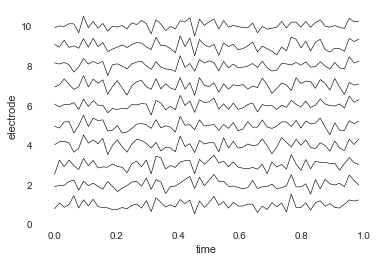

In [15]:
bo.plot_data()

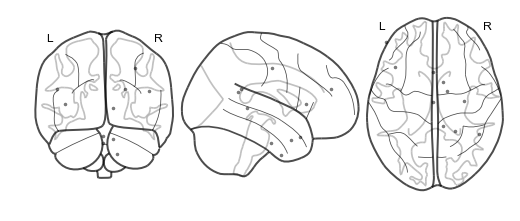

In [16]:
bo.plot_locs()

The other pieces of the brain object are listed below:

In [17]:
# array of session identifiers for each timepoint
sessions = bo.sessions

# number of sessions
n_sessions = bo.n_sessions

# sample rate
sample_rate = bo.sample_rate

# number of electrodes
n_elecs = bo.n_elecs

# length of each recording session in seconds
n_seconds = bo.n_secs

# the date and time that the bo was created
date_created = bo.date_created

# kurtosis of each electrode
kurtosis = bo.kurtosis

# meta data
meta = bo.meta

# label delinieating observed and reconstructed locations
label = bo.label

# Brain object methods

There are a few other useful methods on a brain object

## `bo.info()`

This method will give you a summary of the brain object:

In [18]:
bo.info()

Number of electrodes: 10
Recording time in seconds: [0.5 0.5]
Sample Rate in Hz: [64, 64]
Number of sessions: 2
Date created: Thu Mar  8 12:50:03 2018
Meta data: {'Hospital': 'DHMC', 'subjectID': '123', 'Investigator': 'Andy'}


## `bo.get_data()`

In [19]:
data_array = bo.get_data()

## `bo.get_zscore_data()`

This method will return a numpy array of the zscored data:

In [20]:
zdata_array = bo.get_zscore_data()

## `bo.get_locs()`

This method will return a numpy array of the electrode locations:

In [21]:
locs = bo.get_locs()

## `bo.get_slice()`
This method allows you to slice out time and locations from the brain object, and returns a brain object. This can occur in place if you set the flag `inplace=True`.

In [22]:
bo_slice = bo.get_slice(sample_inds=None, loc_inds=None, inplace=False)

## `bo.resample()`
This method allows you resample a brain object in place. 

In [23]:
bo.resample(resample_rate=None)

## `bo.plot_data()`

This method normalizes and plots data from brain object:

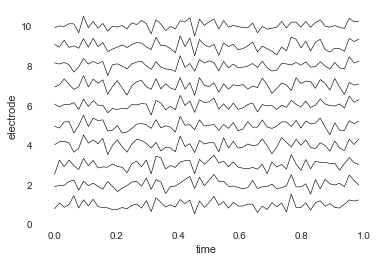

In [24]:
bo.plot_data()

## `bo.plot_locs()`
This method plots electrode locations from brain object:

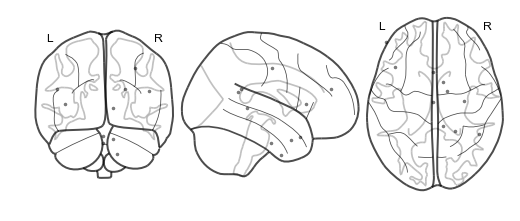

In [25]:
bo.plot_locs()

## `bo.save(fname='something')`

This method will save the brain object to the specified file location.
The data will be saved as a 'bo' file, which is a dictionary containing the elements of a brain object saved in the hd5 format using `deepdish`.

In [26]:
#bo.save(fname='brain_object')

## `bo.to_nii()`

This method converts the brain object into a `nibabel` nifti image.  If `filepath` is specified, the nifti file will be saved. You can also specify a nifti template with the `template` argument. If no template is specified, it will use the gray matter masked MNI 152 brain downsampled to 6mm.  

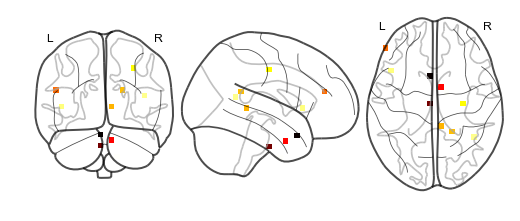

In [27]:
# convert to nifti
nii = bo.to_nii()

# plot first timepoint
nii.plot_glass_brain()

# save the file
# nii = bo.to_nii(filepath='/path/to/file/brain')

# specify a template and resolution
# nii = bo.to_nii(template='/path/to/nifti/file.nii', vox_size=20)